## **Import**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew , boxcox

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler, StandardScaler

import  missingno as msno

import datetime

## **Hello Data**

In [2]:
df = pd.read_csv('smoke_detection_iot.csv')
df.head()

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0,0
1,1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,1,0
2,2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,2,0
3,3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,3,0
4,4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,4,0


In [3]:
df.drop(df.columns[0] ,axis=1 , inplace=True)
df.head()

,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0,0
1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,1,0
2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,2,0
3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,3,0
4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,4,0


In [4]:
df.shape

(62630, 15)

In [5]:
df.dtypes

UTC                 int64
Temperature[C]    float64
Humidity[%]       float64
TVOC[ppb]           int64
eCO2[ppm]           int64
Raw H2              int64
Raw Ethanol         int64
Pressure[hPa]     float64
PM1.0             float64
PM2.5             float64
NC0.5             float64
NC1.0             float64
NC2.5             float64
CNT                 int64
Fire Alarm          int64
dtype: object

In [6]:
df.columns = ['UTC', 'Temperature[C]', 'Humidity[%]', 'TVOC[ppb]', 'eCO2[ppm]',
       'Raw_H2', 'Raw_Ethanol', 'Pressure[hPa]', 'PM1.0', 'PM2.5', 'NC0.5',
       'NC1.0', 'NC2.5', 'CNT', 'Fire_Alarm']
df.head()

,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw_H2,Raw_Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire_Alarm
0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0,0
1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,1,0
2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,2,0
3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,3,0
4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,4,0


In [7]:
df = df.astype('float')
df.head()

,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw_H2,Raw_Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire_Alarm
0,1.654733e+09,20.000,57.36,0.0,400.0,12306.0,18520.0,939.735,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.654733e+09,20.015,56.67,0.0,400.0,12345.0,18651.0,939.744,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.654733e+09,20.029,55.96,0.0,400.0,12374.0,18764.0,939.738,0.0,0.0,0.0,0.0,0.0,2.0,0.0
3,1.654733e+09,20.044,55.28,0.0,400.0,12390.0,18849.0,939.736,0.0,0.0,0.0,0.0,0.0,3.0,0.0
4,1.654733e+09,20.059,54.69,0.0,400.0,12403.0,18921.0,939.744,0.0,0.0,0.0,0.0,0.0,4.0,0.0


## **Datetime**

In [8]:
dt_ts = [datetime.date.fromtimestamp(i) for i in df['UTC']]
dt_ts[:5]

[datetime.date(2022, 6, 9),
 datetime.date(2022, 6, 9),
 datetime.date(2022, 6, 9),
 datetime.date(2022, 6, 9),
 datetime.date(2022, 6, 9)]

In [9]:
time = pd.Series(dt_ts)
time[:5]

0    2022-06-09
1    2022-06-09
2    2022-06-09
3    2022-06-09
4    2022-06-09
dtype: object

In [10]:
df.insert(0 , 'Time' , time)
df.drop('UTC' , axis=1 , inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62630 entries, 0 to 62629
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Time            62630 non-null  object 
 1   Temperature[C]  62630 non-null  float64
 2   Humidity[%]     62630 non-null  float64
 3   TVOC[ppb]       62630 non-null  float64
 4   eCO2[ppm]       62630 non-null  float64
 5   Raw_H2          62630 non-null  float64
 6   Raw_Ethanol     62630 non-null  float64
 7   Pressure[hPa]   62630 non-null  float64
 8   PM1.0           62630 non-null  float64
 9   PM2.5           62630 non-null  float64
 10  NC0.5           62630 non-null  float64
 11  NC1.0           62630 non-null  float64
 12  NC2.5           62630 non-null  float64
 13  CNT             62630 non-null  float64
 14  Fire_Alarm      62630 non-null  float64
dtypes: float64(14), object(1)
memory usage: 7.2+ MB


In [11]:
df['Time'] = pd.to_datetime(df['Time'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62630 entries, 0 to 62629
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Time            62630 non-null  datetime64[ns]
 1   Temperature[C]  62630 non-null  float64       
 2   Humidity[%]     62630 non-null  float64       
 3   TVOC[ppb]       62630 non-null  float64       
 4   eCO2[ppm]       62630 non-null  float64       
 5   Raw_H2          62630 non-null  float64       
 6   Raw_Ethanol     62630 non-null  float64       
 7   Pressure[hPa]   62630 non-null  float64       
 8   PM1.0           62630 non-null  float64       
 9   PM2.5           62630 non-null  float64       
 10  NC0.5           62630 non-null  float64       
 11  NC1.0           62630 non-null  float64       
 12  NC2.5           62630 non-null  float64       
 13  CNT             62630 non-null  float64       
 14  Fire_Alarm      62630 non-null  float64       
dtypes:

In [12]:
df.head()

,Time,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw_H2,Raw_Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire_Alarm
0,2022-06-09,20.000,57.36,0.0,400.0,12306.0,18520.0,939.735,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2022-06-09,20.015,56.67,0.0,400.0,12345.0,18651.0,939.744,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2022-06-09,20.029,55.96,0.0,400.0,12374.0,18764.0,939.738,0.0,0.0,0.0,0.0,0.0,2.0,0.0
3,2022-06-09,20.044,55.28,0.0,400.0,12390.0,18849.0,939.736,0.0,0.0,0.0,0.0,0.0,3.0,0.0
4,2022-06-09,20.059,54.69,0.0,400.0,12403.0,18921.0,939.744,0.0,0.0,0.0,0.0,0.0,4.0,0.0


## **Train-Test-Split**

In [13]:
train_set , test_set = train_test_split(df , test_size=0.2 , random_state=2)
train_set.shape , test_set.shape

((50104, 15), (12526, 15))

## **Missing Values**

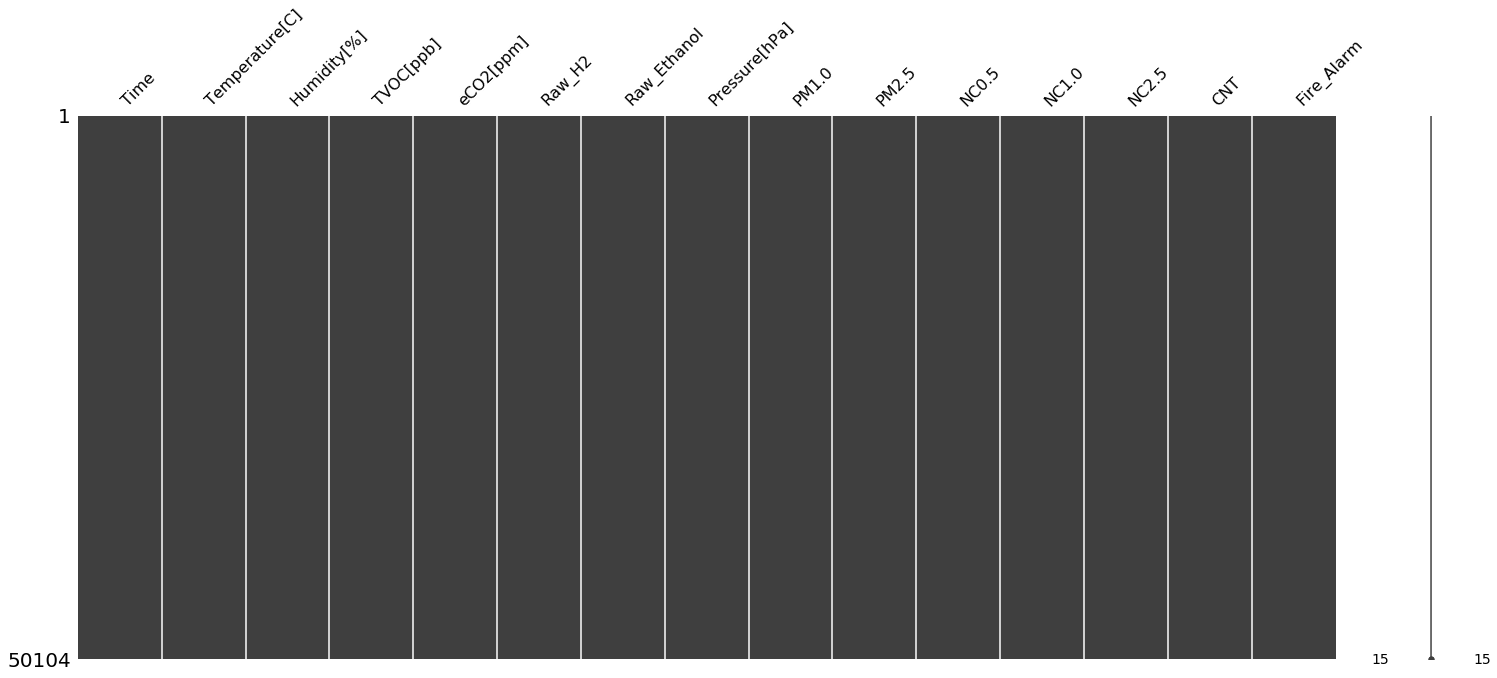

In [14]:
msno.matrix(train_set)

In [15]:
train_set.isnull().sum()

Time              0
Temperature[C]    0
Humidity[%]       0
TVOC[ppb]         0
eCO2[ppm]         0
Raw_H2            0
Raw_Ethanol       0
Pressure[hPa]     0
PM1.0             0
PM2.5             0
NC0.5             0
NC1.0             0
NC2.5             0
CNT               0
Fire_Alarm        0
dtype: int64

In [16]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50104 entries, 62009 to 23720
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Time            50104 non-null  datetime64[ns]
 1   Temperature[C]  50104 non-null  float64       
 2   Humidity[%]     50104 non-null  float64       
 3   TVOC[ppb]       50104 non-null  float64       
 4   eCO2[ppm]       50104 non-null  float64       
 5   Raw_H2          50104 non-null  float64       
 6   Raw_Ethanol     50104 non-null  float64       
 7   Pressure[hPa]   50104 non-null  float64       
 8   PM1.0           50104 non-null  float64       
 9   PM2.5           50104 non-null  float64       
 10  NC0.5           50104 non-null  float64       
 11  NC1.0           50104 non-null  float64       
 12  NC2.5           50104 non-null  float64       
 13  CNT             50104 non-null  float64       
 14  Fire_Alarm      50104 non-null  float64       
dty

## **Exploratory Data Analysis (EDA)**

### Single varaible analysis

In [17]:
train_set.describe()

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw_H2,Raw_Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire_Alarm
count,50104.000000,50104.000000,50104.000000,50104.000000,50104.000000,50104.000000,50104.000000,50104.000000,50104.000000,50104.000000,50104.000000,50104.000000,50104.000000,50104.000000
mean,16.006681,48.523095,1955.238604,671.350591,12942.423639,19754.879151,938.625142,101.619519,186.481177,496.137261,205.820879,80.994343,10501.073308,0.713596
std,14.357128,8.877214,7842.258901,1908.654413,273.393271,612.652118,1.330063,926.545890,1984.808927,4286.171454,2224.286977,1088.267037,7593.062405,0.452085
min,-22.010000,10.740000,0.000000,400.000000,10668.000000,15317.000000,930.852000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11.160750,47.530000,129.000000,400.000000,12830.000000,19435.000000,938.700000,1.280000,1.340000,8.840000,1.385000,0.033000,3626.750000,0.000000
50%,20.150500,50.140000,982.000000,400.000000,12923.000000,19501.000000,938.815000,1.810000,1.880000,12.450000,1.942000,0.044000,9317.500000,1.000000
75%,25.400000,53.240000,1189.000000,438.000000,13109.000000,20080.000000,939.415000,2.090000,2.180000,14.410000,2.248000,0.051000,17147.250000,1.000000
max,59.930000,75.080000,60000.000000,60000.000000,13803.000000,21410.000000,939.856000,14333.690000,45432.260000,61482.030000,51914.680000,30026.438000,24993.000000,1.000000


In [18]:
def median_abs_dev(x):
    return (x - x.median()).abs().median()

median_abs_dev(train_set.iloc[: , 1:])

Temperature[C]       6.3305
Humidity[%]          2.8500
TVOC[ppb]          422.0000
eCO2[ppm]            0.0000
Raw_H2             122.0000
Raw_Ethanol        127.0000
Pressure[hPa]        0.4090
PM1.0                0.3300
PM2.5                0.3500
NC0.5                2.3000
NC1.0                0.3580
NC2.5                0.0080
CNT               6409.5000
Fire_Alarm           0.0000
dtype: float64

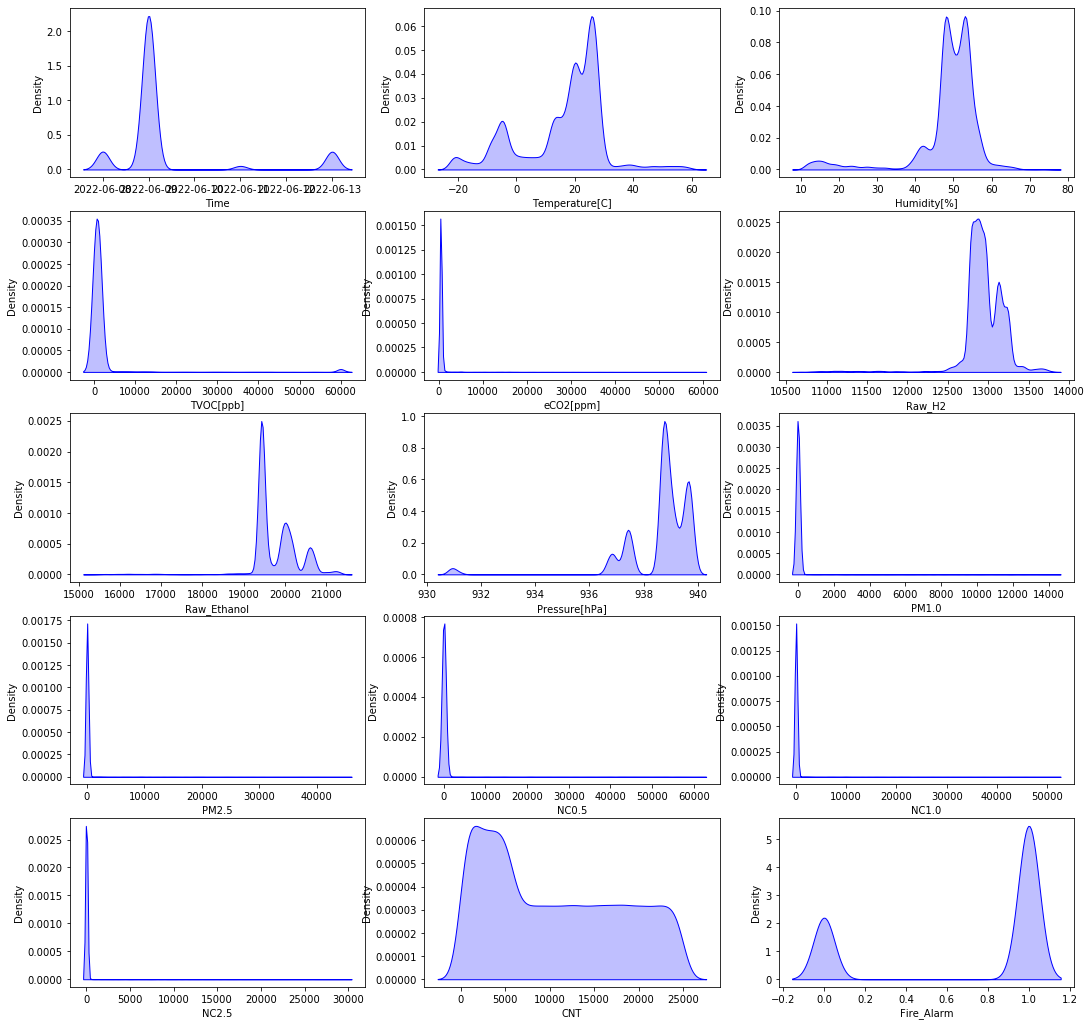

In [19]:
fig , ax = plt.subplots(5 , 3 , figsize=(18,18))
ax_flat = ax.flatten()

for i,col in enumerate(train_set.columns):
    ax = ax_flat[i]
    sns.kdeplot(train_set[col]  , color='b', ax=ax , fill=True)

KeyError: 0

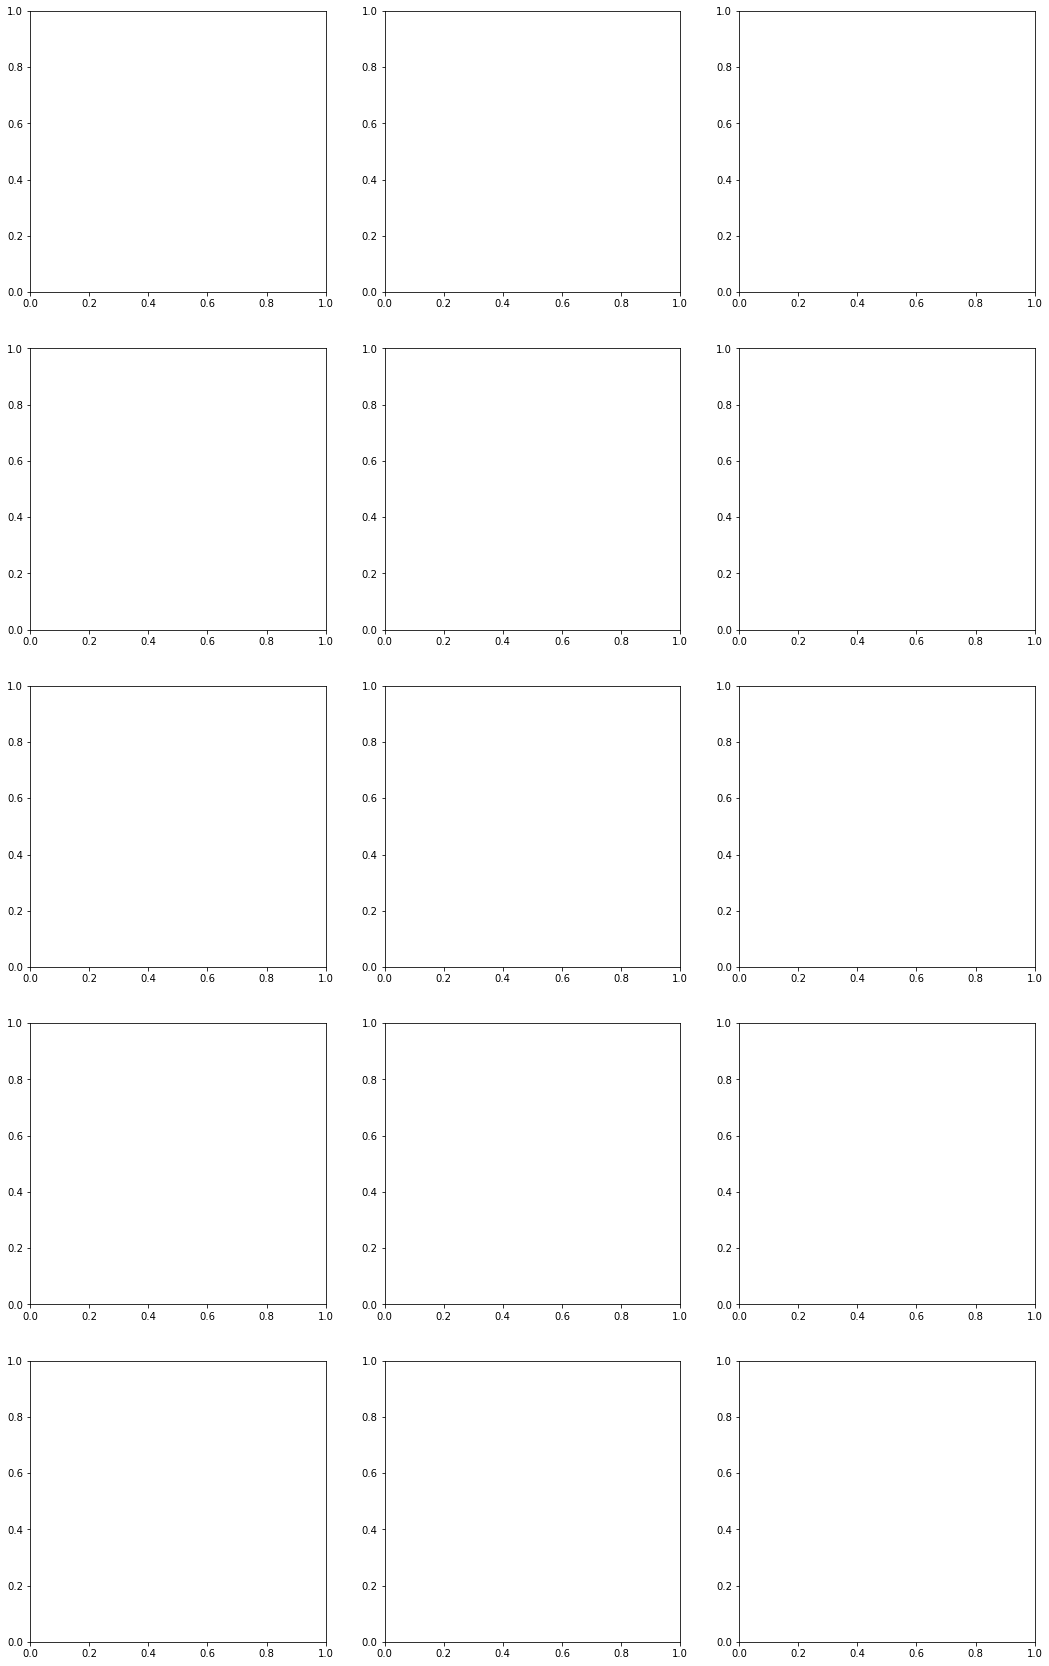

In [20]:
fig , ax = plt.subplots(5 , 3 , figsize=(18,30))
ax_flat = ax.flatten()

for i,col in enumerate(train_set.columns[1:-1]):
    ax = ax_flat[i]
    sns.boxplot(train_set[col] , ax=ax)
    ax.set_title(col)

### Two Varaibles Analysis

In [ ]:
corr = train_set.corr()

In [ ]:
plt.figure(figsize=(16, 16))
sns.heatmap(corr, annot=True , cmap='viridis')

In [ ]:
target_corr = corr['Fire_Alarm'].abs().sort_values(ascending=False)
target_corr

In [ ]:
Cols = list([target_corr.index][0])
Cols.remove('Fire_Alarm')

fig , ax = plt.subplots(5 , 3 , figsize=(16 , 30))
ax_flat = ax.flatten()

for i,col in enumerate(Cols):
    ax = ax_flat[i]
    sns.scatterplot(data = train_set , x=train_set[col] , y=train_set['Fire_Alarm'] , alpha=0.2 , ax=ax)
    ax.set_title(col)

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=train_set , x=train_set.iloc[: , 4] , y=train_set.iloc[: , 5] , alpha=0.2 , hue=train_set['Fire_Alarm']);

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=train_set , x=train_set.iloc[: , 3] , y=train_set.iloc[: , 5] , alpha=0.2 ,  hue=train_set['Fire_Alarm']);

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=train_set , x=train_set.iloc[: , 6] , y=train_set.iloc[: , -2]  ,  hue=train_set['Fire_Alarm']);

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=train_set , x=train_set.iloc[: , 2] , alpha=0.2 ,  y=train_set.iloc[: , 7],  hue=train_set['Fire_Alarm']);

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=train_set , x=train_set.iloc[: , 2] , alpha=0.2 ,  y=train_set.iloc[: , 3],  hue=train_set['Fire_Alarm']);

In [ ]:
fig , ax = plt.subplots(2 , 2 , figsize = (16 , 16))
ax_flat = ax.flatten()

for i in range(9,13):
    ax = ax_flat[i-9]
    sns.scatterplot(data=train_set , x=train_set.iloc[: , 8]  ,  y=train_set.iloc[: , i]  ,  hue=train_set['Fire_Alarm'] , ax = ax)

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=train_set , x=train_set.iloc[: , 3] , y=train_set.iloc[: , -7]  ,  hue=train_set['Fire_Alarm']);

In [ ]:
Cols = list([target_corr.index][0])
Cols.remove('Fire_Alarm')

fig , ax = plt.subplots(5 , 3 , figsize=(16 , 30))
ax_flat = ax.flatten()

for i,col in enumerate(Cols):
    ax = ax_flat[i]
    sns.violinplot(data = train_set , x='Fire_Alarm' , y=train_set[col] , ax=ax)
    ax.set_title(col)

## **Outliers**

In [ ]:
pt = PowerTransformer()

# Create figure with 2 rows and 2 columns of subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Boxplot of original Raw_H2
fliers = axes[0, 0].boxplot(train_set.Raw_H2, vert=False, whis=1.5)['fliers'][0].get_ydata()
axes[0, 0].set_title(f'Number of fliers: {len(fliers)}')

# Box-Cox transformation of Raw_H2
transformed_Raw_H2 = pt.fit_transform(train_set['Raw_H2'][: , np.newaxis])
fliers = axes[0, 1].boxplot(transformed_Raw_H2, vert=False, whis=1.5)['fliers'][0].get_ydata()
axes[0, 1].set_title(f'Number of fliers: {len(fliers)}')

# Histogram of original Raw_H2
skewness_orig = skew(train_set.Raw_H2)
axes[1, 0].hist(train_set.Raw_H2, 50)
axes[1, 0].set_title(f'Histogram of Raw_H2 (Skewness: {skewness_orig:.2f})')

# Histogram of transformed Raw_H2
skewness_transformed = skew(transformed_Raw_H2)
axes[1, 1].hist(transformed_Raw_H2, 50)
axes[1, 1].set_title(f'Histogram of transformed Raw_H2 (Skewness: {skewness_transformed[0]})')

# Adjust subplot spacing and display the figure
plt.tight_layout()
plt.show()

In [ ]:
pt = PowerTransformer()

cols = ['Temperature[C]', 'Humidity[%]', 'TVOC[ppb]' ,'eCO2[ppm]', 'Raw_H2', 'Raw_Ethanol']
# Create figure with n_rows rows and 4 columns of subplots
n_rows = len(cols)

fig, axes = plt.subplots(n_rows, 4, figsize=(16, 4*n_rows))

# iterate over numerical features and plot boxplots and histograms
for i, col in enumerate(cols):
    
    # compute skewness of original feature
    skewness_orig = skew(train_set[col])
    
    # plot boxplot of original feature
    fliers = axes[i, 0].boxplot(train_set[col], vert=False, whis=1.5)['fliers'][0].get_ydata()
    axes[i, 0].set_title(f'Number of fliers: {len(fliers)}')
    
    # plot histogram of original feature
    axes[i, 1].hist(train_set[col], 50)
    axes[i, 1].set_title(f'Histogram of {col} (Skewness: {skewness_orig:.2f})')
    
    # plot boxplot of PowerTransformer transformed feature
    transformed_feature = pt.fit_transform(train_set[col][: , None])
    skewness_transformed = skew(transformed_feature)
    transformed_fliers = axes[i, 2].boxplot(transformed_feature, vert=False, whis=1.5)['fliers'][0].get_ydata()
    axes[i, 2].set_title(f'Number of fliers: {len(transformed_fliers)}')
    
    # plot histogram of PowerTransformer transformed feature
    axes[i, 3].set_title(f'Transformed {col} (Skewness: {skewness_transformed[0]})')
    axes[i, 3].hist(transformed_feature, 50)

# Adjust subplot spacing and display the figure
plt.tight_layout()
plt.show()

In [ ]:
pt = PowerTransformer()

cols = ['Pressure[hPa]', 'PM1.0', 'PM2.5', 'NC0.5', 'NC1.0', 'NC2.5']
# Create figure with n_rows rows and 4 columns of subplots
n_rows = len(cols)

fig, axes = plt.subplots(n_rows, 4, figsize=(16, 4*n_rows))

# iterate over numerical features and plot boxplots and histograms
for i, col in enumerate(cols):

    
    # compute skewness of original feature
    skewness_orig = skew(train_set[col])
    
    # plot boxplot of original feature
    fliers = axes[i, 0].boxplot(train_set[col], vert=False, whis=1.5)['fliers'][0].get_ydata()
    axes[i, 0].set_title(f'Number of fliers: {len(fliers)}')
    
    # plot histogram of original feature
    axes[i, 1].hist(train_set[col], 50)
    axes[i, 1].set_title(f'Histogram of {col} (Skewness: {skewness_orig:.2f})')
    
    # plot boxplot of PowerTransformer transformed feature
    transformed_feature = pt.fit_transform(train_set[col][: , None])
    skewness_transformed = skew(transformed_feature)
    transformed_fliers = axes[i, 2].boxplot(transformed_feature, vert=False, whis=1.5)['fliers'][0].get_ydata()
    axes[i, 2].set_title(f'Number of fliers: {len(transformed_fliers)}')
    
    # plot histogram of PowerTransformer transformed feature
    axes[i, 3].set_title(f'Transformed {col} (Skewness: {skewness_transformed[0]})')
    axes[i, 3].hist(transformed_feature, 50)

# Adjust subplot spacing and display the figure
plt.tight_layout()
plt.show()

In [ ]:
cols = ['Temperature[C]', 'Humidity[%]', 'TVOC[ppb]', 'Raw_H2', 'Raw_Ethanol','Pressure[hPa]', 'PM1.0', 'PM2.5', 'NC0.5', 'NC1.0', 'NC2.5']
train_set2 = train_set.copy()
for col in cols:
    train_set2[col] = pt.fit_transform(train_set[col][: , None])

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(12, 8))
axes_flat = axes.flatten()

cols = ['Temperature[C]', 'Humidity[%]', 'TVOC[ppb]', 'Raw_H2', 'Raw_Ethanol']
for i, col in enumerate(cols):
    ax = axes_flat[i]
    ax.hist(train_set2[col], 50)
    ax.set_title(col)

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(12, 8))
axes_flat = axes.flatten()

cols = ['Pressure[hPa]', 'PM1.0', 'PM2.5', 'NC0.5', 'NC1.0', 'NC2.5']
for i, col in enumerate(cols):
    ax = axes_flat[i]
    ax.hist(train_set2[col], 50)
    ax.set_title(col)

In [ ]:
pt = PowerTransformer()

cols = ['Temperature[C]', 'Humidity[%]', 'TVOC[ppb]' ,'eCO2[ppm]', 'Raw_H2', 'Raw_Ethanol']
# Create figure with n_rows rows and 4 columns of subplots
n_rows = len(cols)

fig, axes = plt.subplots(n_rows, 4, figsize=(16, 4*n_rows))

# iterate over numerical features and plot boxplots and histograms
for i, col in enumerate(cols):
    
    # compute skewness of original feature
    skewness_orig = skew(train_set[col])
    
    # plot boxplot of original feature
    fliers = axes[i, 0].boxplot(train_set[col], vert=False, whis=2.5)['fliers'][0].get_ydata()
    axes[i, 0].set_title(f'Number of fliers: {len(fliers)}')
    
    # plot histogram of original feature
    axes[i, 1].hist(train_set[col], 50)
    axes[i, 1].set_title(f'Histogram of {col} (Skewness: {skewness_orig:.2f})')
    
    # plot boxplot of PowerTransformer transformed feature
    transformed_feature = pt.fit_transform(train_set[col][: , None])
    skewness_transformed = skew(transformed_feature)
    transformed_fliers = axes[i, 2].boxplot(transformed_feature, vert=False, whis=2.5)['fliers'][0].get_ydata()
    axes[i, 2].set_title(f'Number of fliers: {len(transformed_fliers)}')
    
    # plot histogram of PowerTransformer transformed feature
    axes[i, 3].set_title(f'Transformed {col} (Skewness: {skewness_transformed[0]})')
    axes[i, 3].hist(transformed_feature, 50)

# Adjust subplot spacing and display the figure
plt.tight_layout()

In [ ]:
pt = PowerTransformer()

cols = ['Pressure[hPa]', 'PM1.0', 'PM2.5', 'NC0.5', 'NC1.0', 'NC2.5']
# Create figure with n_rows rows and 4 columns of subplots
n_rows = len(cols)

fig, axes = plt.subplots(n_rows, 4, figsize=(16, 4*n_rows))

# iterate over numerical features and plot boxplots and histograms
for i, col in enumerate(cols):

    
    # compute skewness of original feature
    skewness_orig = skew(train_set[col])
    
    # plot boxplot of original feature
    fliers = axes[i, 0].boxplot(train_set[col], vert=False, whis=3.5)['fliers'][0].get_ydata()
    axes[i, 0].set_title(f'Number of fliers: {len(fliers)}')
    
    # plot histogram of original feature
    axes[i, 1].hist(train_set[col], 50)
    axes[i, 1].set_title(f'Histogram of {col} (Skewness: {skewness_orig:.2f})')
    
    # plot boxplot of PowerTransformer transformed feature
    transformed_feature = pt.fit_transform(train_set[col][: , None])
    skewness_transformed = skew(transformed_feature)
    transformed_fliers = axes[i, 2].boxplot(transformed_feature, vert=False, whis=3.5)['fliers'][0].get_ydata()
    axes[i, 2].set_title(f'Number of fliers: {len(transformed_fliers)}')
    
    # plot histogram of PowerTransformer transformed feature
    axes[i, 3].set_title(f'Transformed {col} (Skewness: {skewness_transformed[0]})')
    axes[i, 3].hist(transformed_feature, 50)

# Adjust subplot spacing and display the figure
plt.tight_layout()
plt.show()

In [ ]:
cols = ['Temperature[C]', 'Humidity[%]', 'TVOC[ppb]', 'Raw_H2', 'Raw_Ethanol']
desc = train_set2[cols].describe()
Q1 = desc.loc['25%']
Q3 = desc.loc['75%']
IQR = Q3 - Q1
lower_cap = Q1 - 2.5*IQR
upper_cap = Q3 + 2.5*IQR

flags = (train_set2[cols] < lower_cap) | (train_set2[cols] > upper_cap)
flags.sum()

In [ ]:
flags.sum(1).astype(np.bool_).sum()

In [ ]:
train_set2 = train_set2[~flags.sum(1).astype(np.bool_)]
train_set2

In [ ]:
flags = train_set2['PM1.0'] > 2
flags.sum()

In [ ]:
train_set2 = train_set2[~flags]
train_set2

In [ ]:
flags = train_set2['eCO2[ppm]'] > 5000
flags.sum()

In [ ]:
train_set2 = train_set2[~flags]
train_set2

## **ReProcessing**

In [ ]:
fig , ax = plt.subplots(5 , 3 , figsize=(18,18))
ax_flat = ax.flatten()

for i,col in enumerate(train_set2.columns):
    ax = ax_flat[i]
    sns.kdeplot(train_set2[col]  , color='r', ax=ax , fill=True)

In [ ]:
fig , ax = plt.subplots(5 , 3 , figsize=(18,30))
ax_flat = ax.flatten()

for i,col in enumerate(train_set2.columns[1:-1]):
    ax = ax_flat[i]
    sns.boxplot(train_set2[col] , ax=ax , color='crimson')
    ax.set_title(col)

In [ ]:
Cols = list(train_set2.columns)[1:]
Cols.remove('Fire_Alarm')

fig , ax = plt.subplots(5 , 3 , figsize=(16 , 30))
ax_flat = ax.flatten()

for i,col in enumerate(Cols):
    ax = ax_flat[i]
    sns.scatterplot(data = train_set2 , x=train_set2[col] , y=train_set2['Fire_Alarm'] , alpha=0.2 , ax=ax , c='r')

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=train_set2 , x=train_set2.iloc[: , 4] , y=train_set2.iloc[: , 5]  , hue=train_set2['Fire_Alarm']);

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=train_set2 , x=train_set2.iloc[: , 3] , y=train_set2.iloc[: , 5] , alpha=0.2 ,  hue=train_set2['Fire_Alarm']);

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=train_set2 , x=train_set2.iloc[: , 6] , y=train_set2.iloc[: , -2]  ,  hue=train_set2['Fire_Alarm']);

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=train_set2 , x=train_set2.iloc[: , 2] , alpha=0.2 ,  y=train_set2.iloc[: , 7],  hue=train_set2['Fire_Alarm']);

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=train_set2 , x=train_set2.iloc[: , 3] , y=train_set2.iloc[: , -7]  ,  hue=train_set2['Fire_Alarm']);

In [ ]:
Cols = list(train_set2.columns)[1:]
Cols.remove('Fire_Alarm')

fig , ax = plt.subplots(5 , 3 , figsize=(16 , 30))
ax_flat = ax.flatten()

for i,col in enumerate(Cols):
    ax = ax_flat[i]
    sns.violinplot(data = train_set2 , x='Fire_Alarm' , y=train_set2[col] , ax=ax)
    ax.set_title(col)

## **Data/Feature Reduction**

In [ ]:
corr = train_set2.corr()
corr[['Fire_Alarm']].abs().sort_values(by='Fire_Alarm')

In [ ]:
plt.figure(figsize=(16, 16))
sns.heatmap(corr, annot=True , cmap='viridis')

In [ ]:
train_set2.drop(['NC2.5','NC1.0','PM2.5','NC0.5'], axis=1, inplace=True)
train_set2

## **Data Normalization**

In [ ]:
normz = MinMaxScaler()
train_set2.iloc[: , 1:] = normz.fit_transform(train_set2.iloc[: , 1:])
train_set2

In [ ]:
fig, axes = plt.subplots(4, 3, figsize=(16, 18))
axes_flat = axes.flatten()

for i, col in enumerate([train_set2.columns][0]):
    ax = axes_flat[i]
    ax.hist(train_set2.loc[:, col], 50)
    ax.set_title(col)

### **Standardization**

## **Model Selection**